## Practice DataHanding

#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [109]:
import numpy as np
import pandas as pd
import wget
import matplotlib.pyplot as plt

In [11]:
wget.download('https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv', '/Users/spokr/OneDrive/Documents/GitHub/train.csv')

100% [..............................................................................] 60302 / 60302

'/Users/spokr/OneDrive/Documents/GitHub/train (1).csv'

In [159]:
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 1
Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
(can you do it using groupby?)

In [108]:
surv_count = data['Survived'].sum()
groups = data.groupby(['Pclass'])
groups_count = groups['Survived'].sum()
surv_rate = groups_count / surv_count * 100
surv_rate

Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64

## Task 2
Plot the average number of parents onboard (`Parch`) as a function of the number of siblings onboard (`SibSp`)

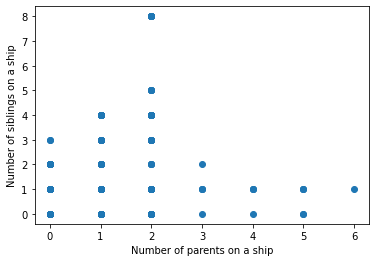

In [131]:
fig, ax = plt.subplots()
ax.scatter(x = data['Parch'], y = data['SibSp'])
plt.xlabel("Number of parents on a ship")
plt.ylabel("Number of siblings on a ship")

plt.show()

## Task 3

In [228]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
    
  features = dataset[["Fare", "Sex"]].copy()
  features.Sex = features.Sex.replace(['male', 'female'],[1,0])
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    # <YOUR CODE>
    n_neighbors=6, weights = 'distance'
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.75


## Task 4
Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [258]:
from sklearn.model_selection import train_test_split
def feature_selection_and_preprocessing(dataset):
 
  features = dataset[["Fare", "Sex"]].copy()
  features.Sex = features.Sex.replace(['male', 'female'],[1,0])
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    n_neighbors=6, weights = 'distance'
)


# Validation code 
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size = 100,
                                         random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.76


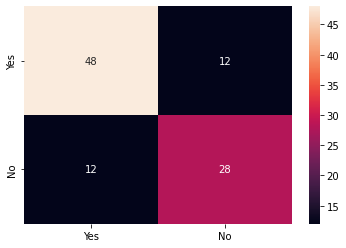

In [261]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Survived = ['Yes','No']
cm = pd.DataFrame(confusion_matrix(data_test.Survived, test_predictions), 
                  columns=Survived, index = Survived)
                  
sns.heatmap(cm, annot=True, fmt='d');